In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Convergence in Probability:
$\lim_{N \to \infty} Pr(|X_{N}-X|>\epsilon)=0$ <br>

Let ${\{{X}_{1}, {X}_{2}, {X}_{3},..., {X}_{N},..  }\}$ be a sequence of random variables defined on a sample space $\Omega$. And let $\epsilon$ >0.
The sequence $\{X_{N}\}$ is said to be convergent in probability to a random variable $X$ if and only if the above condition is satisfied.

The probability of finding the converged values outside an $\epsilon$ radius of a random variable keeps going down.
Eventually it becomes 0.

## Is the sample mean a consistent estimator?

Let $X_{1}, X_{2}, X_{3},.., X_{N}$ be i.i.d random variables from gaussian distribution $N(\mu, \sigma^{2})$. Then the estimator, 
$\bar{X}_{N}= \frac{\sum_{i=1}^{N}X_{i}}{N}$ is used to estimate the true mean of the distribution $\mu$.

Is this estimator consistent? As the sample size increases, does it take us near to the truth $\mu$? <br>
Does this sequence $\{\bar{X}_{1}, \bar{X}_{2}, \bar{X}_{3},..., \bar{X}_{N},.. \}$ converge (in probability) to $\mu$ ? If the sample mean estimator satisfies this condition, then it is said to be consistent. Let's verify it through simulation.

## Simulation

1. Generate a Gaussian WN realization of sample size $N$ with mean=2 and variance=1
2. Get the cumulative sum of those numbers
3. Divide the list by a list containing sample sizes from 1 to $N$
4. Subtract $\mu$ from each element of the list
5. Repeat this process $M$ times
6. Result will be a list with $M$ elements, each having $N$ elements
7. Create a NumPy array. The array will be of $(M, N)$ shape. Each row ${\{\bar{X}_{1}-\mu, \bar{X}_{2}-\mu, \bar{X}_{3}-\mu,..., \bar{X}_{N}-\mu  }\}$  will be a realization <br>
8. Transpose of the matrix. Each column will be a realization
9. Plot the matrix. Sample sizes on the x-axis and $(\bar{X}_{N} - \mu)$ on the y-axis <br>
(Note the sample size on the x-axis should be ideally +1 of what is displayed)

In [3]:
N=1000; # Sample size 
M=50; # M is the number of possible realizations that we are generating (Sampling 50 different points)
mu=2;

In [30]:
# check
np.array([list(range(3)) for _ in range(5)])

array([[0, 1, 2],
       [0, 1, 2],
       [0, 1, 2],
       [0, 1, 2],
       [0, 1, 2]])

In [33]:
xbarnmu = np.array([np.cumsum(np.random.normal(mu,1,N))/np.arange(1,N+1) - mu for _ in range(M)]).T

In [34]:
xbarnmu.shape

(1000, 50)

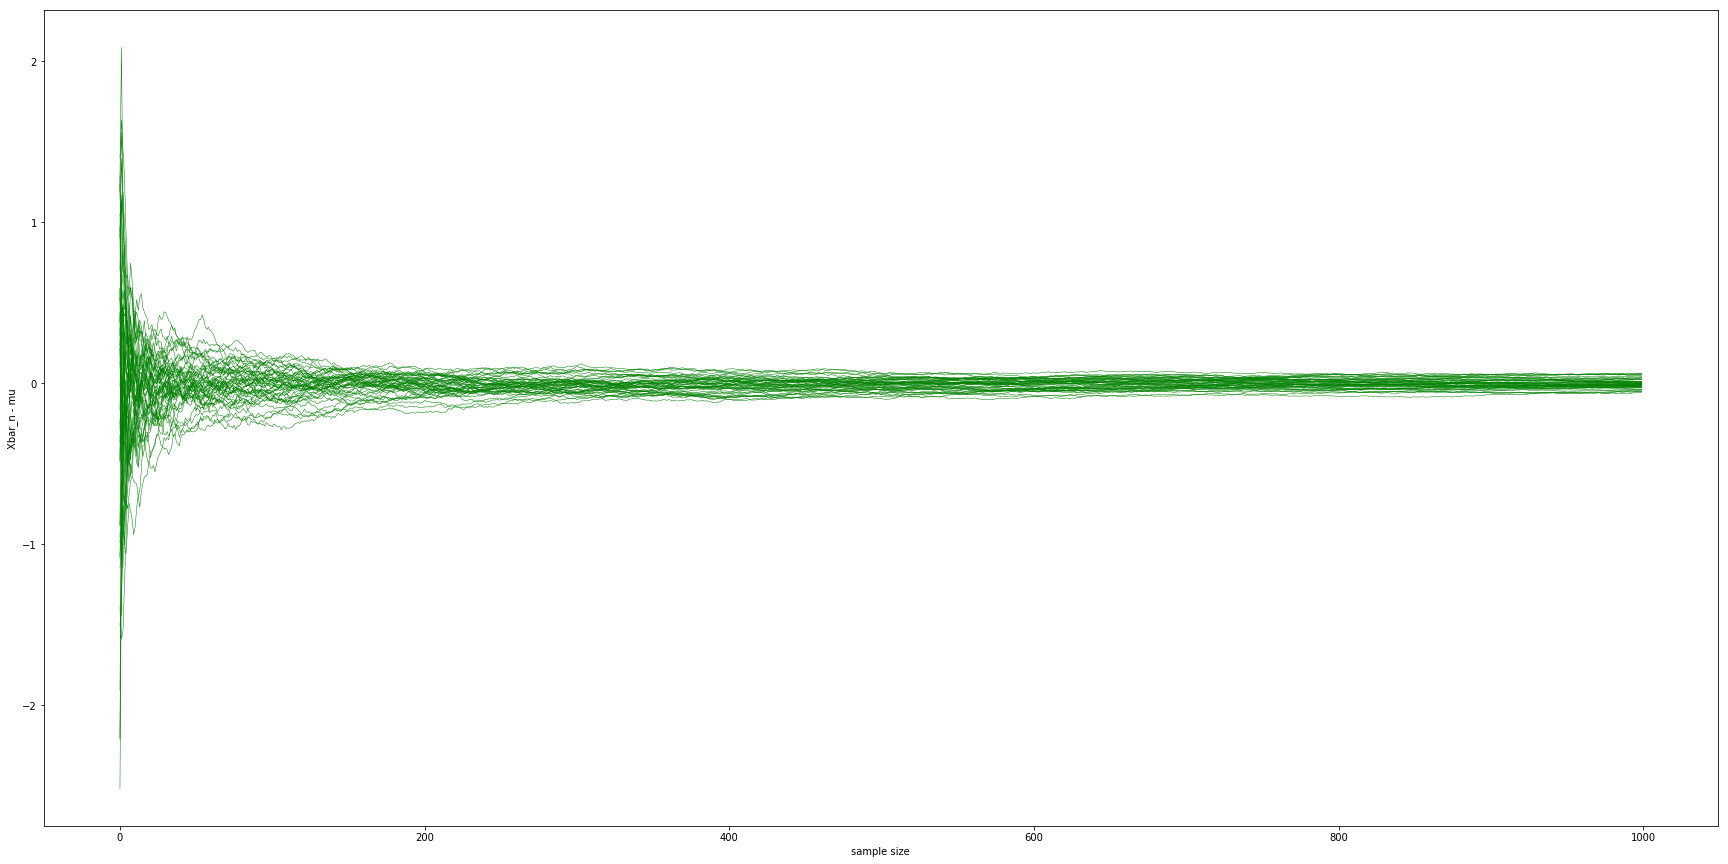

In [35]:
plt.figure(figsize=(30,15))
plt.plot(xbarnmu,color='g', lw=0.5)
plt.xlabel('sample size')
plt.ylabel('Xbar_n - mu');

As we can see, the difference $(\bar{X}_{N} - \mu)$ is shrinking to 0 as we increase the sample size.

In [36]:
e=0.1
abs_xbarnmu = np.array([np.abs(np.cumsum(np.random.normal(mu,1,N))/np.arange(1,N+1) - mu) for _ in range(M)]).T

In [37]:
abs_xbarnmu.shape

(1000, 50)

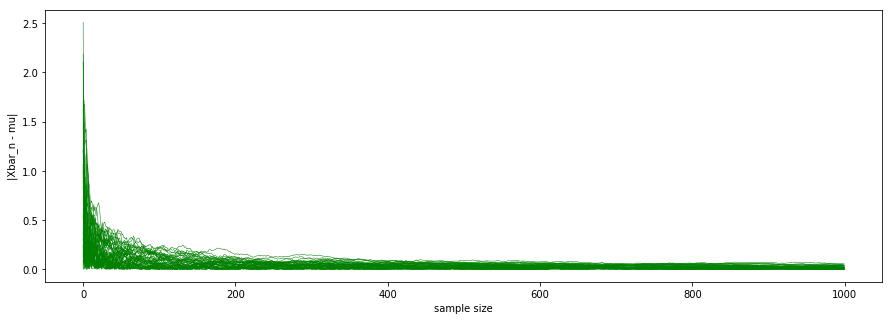

In [38]:
plt.figure(figsize=(15,5))
plt.plot(abs_xbarnmu,color='g', lw=0.5)
plt.xlabel('sample size')
plt.ylabel('|Xbar_n - mu|');

In [39]:
prob = (abs_xbarnmu > e).mean(axis=1)

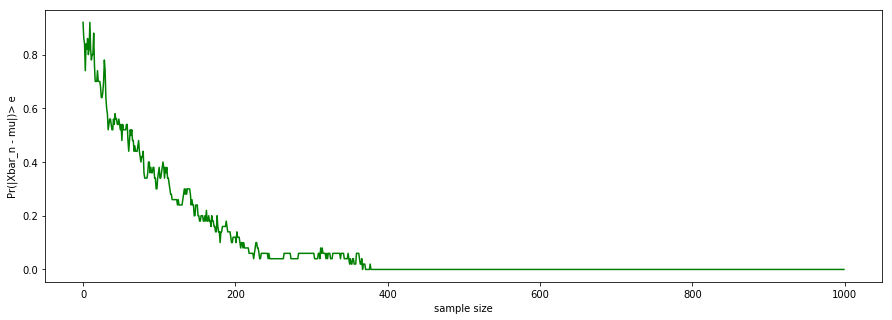

In [40]:
plt.figure(figsize=(15,5))
plt.plot(prob,color='g')
plt.xlabel('sample size')
plt.ylabel('Pr(|Xbar_n - mu|)> e');

## Bias of the estimator
As we know, the sample mean is an unbiased estimator. <br>
Bias = $E(\bar{X}_{N})-\mu = E(\bar{X}_{N}-\mu) $. In practice, average across realizations is done.

In [41]:
bias = xbarnmu.mean(axis=1)

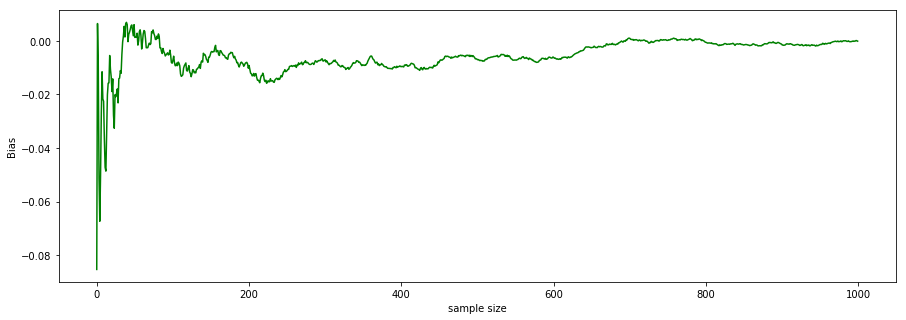

In [42]:
plt.figure(figsize=(15,5))
plt.plot(bias,color='g')
plt.xlabel('sample size')
plt.ylabel('Bias');

Ideally, bias should be 0 for all sample sizes. The difference is because we have taken average only across 50 realizations.